In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [117]:
df = pd.read_csv("E:\Abdul Hai\Personal\Practice Python\Sales Analysis\Sales Data.csv" , encoding= 'unicode_escape')
df.shape

(11251, 15)

In [118]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [120]:
#drop blank Columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [121]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [122]:
#drop null values
df.dropna(inplace=True)

In [123]:
df.shape

(11239, 13)

In [124]:
#change data type
df['Amount']= df['Amount'].astype('int')

In [125]:
df['Amount'].dtypes

dtype('int32')

In [126]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [127]:
# use describe for specifice columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

In [128]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

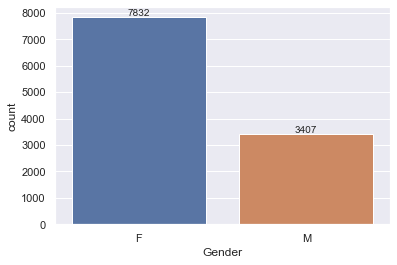

In [129]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

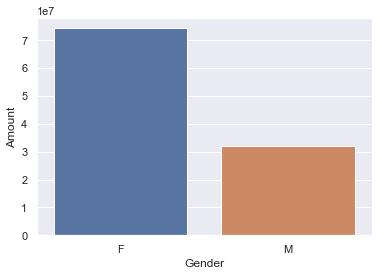

In [130]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount' ,data=sales_gen)

###### from the above graphs we can see that most of the buyers are female & even the purchasing power of females are greater than man

# Age Group

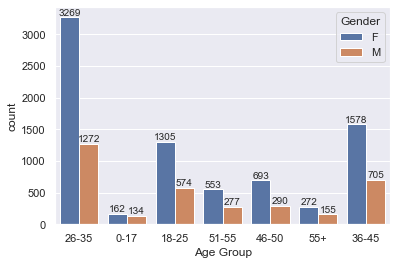

In [131]:
ax=sns.countplot(x="Age Group",hue="Gender", data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

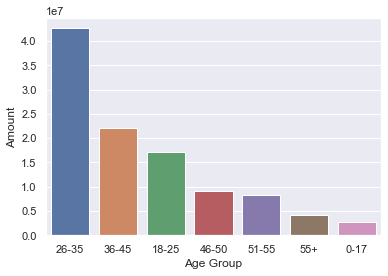

In [132]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group', y='Amount' , data=sales_age)

###### from the above graphs we can see that most of the buyers are of age group between 26-35 female

<AxesSubplot:xlabel='State', ylabel='Orders'>

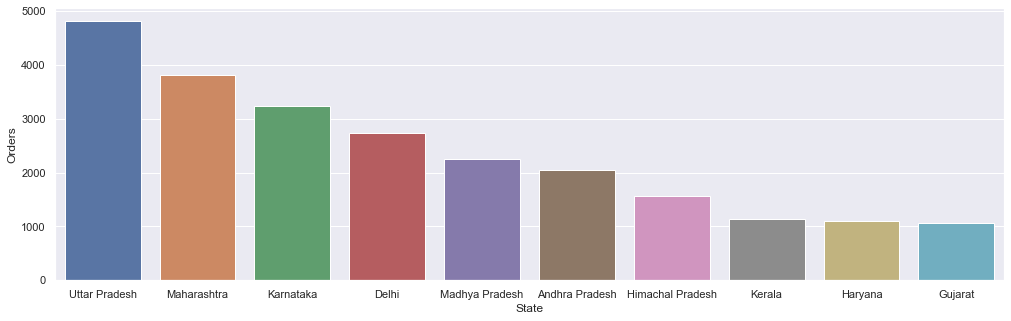

In [133]:
#total number of orders from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Orders', data=sales_state)

<AxesSubplot:xlabel='State', ylabel='Amount'>

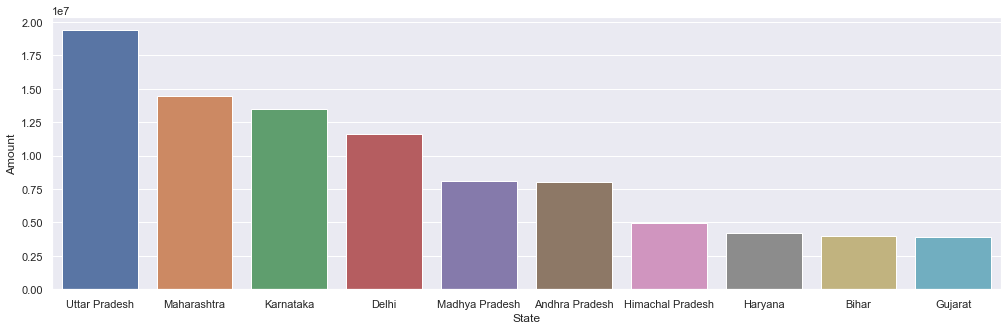

In [134]:
#total number of Sales/Amount from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State',y="Amount", data=sales_state)

###### from above graph we can see that most of the orders and sales/amount are from Uttar Pradesh, Maharashtra & Karnataka respectively

# Marital Status

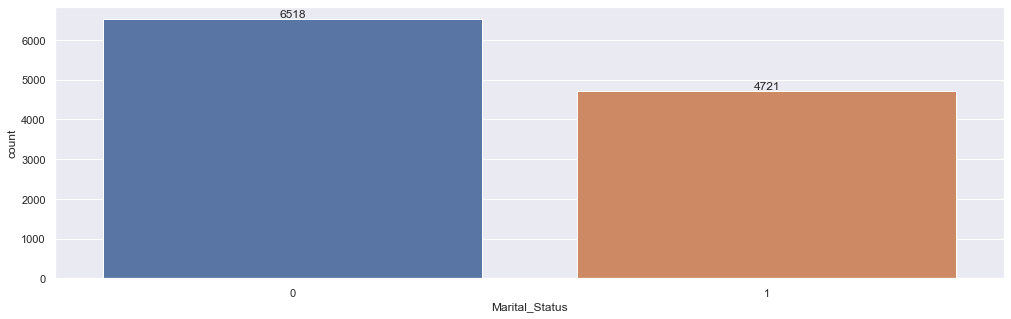

In [135]:
ax = sns.countplot(data = df , x = 'Marital_Status')

sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

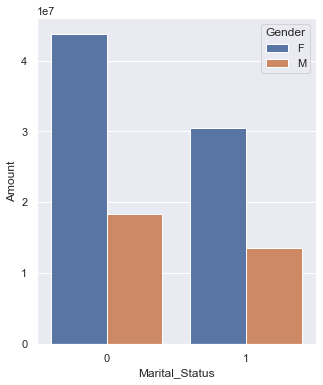

In [136]:
sales_marital = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(5,6)})
sns.barplot(x = 'Marital_Status',y = 'Amount',hue = 'Gender',data = sales_marital)

###### from above graph we can see that most of the buyers are married (women) & they have high purchasing power

# Occupation

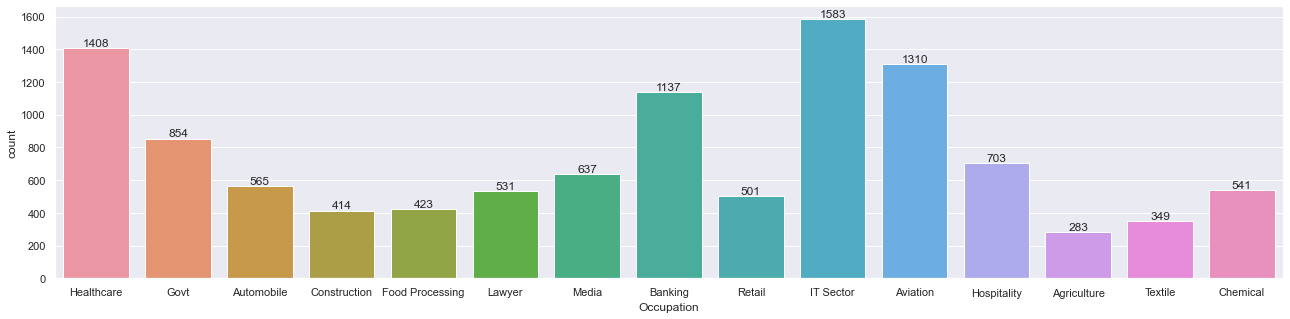

In [137]:
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

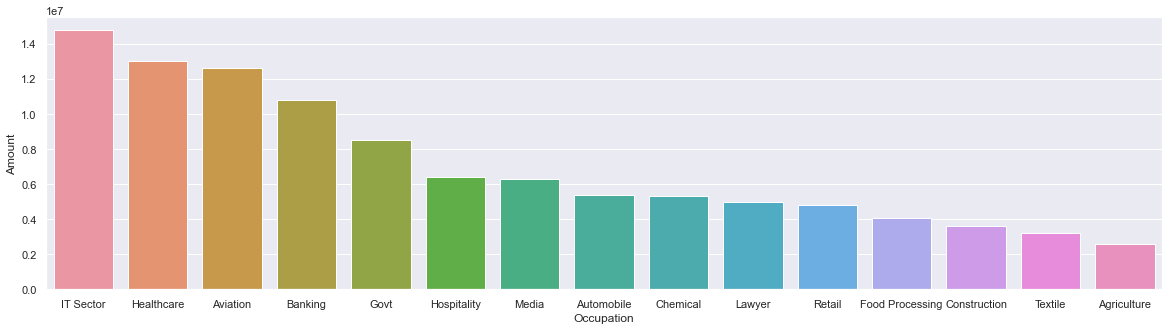

In [138]:
sales_occ = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occ)

###### from above graph we can see that most of the buyers are working in IT, Healthcare & Aviation Sector

# Product Category

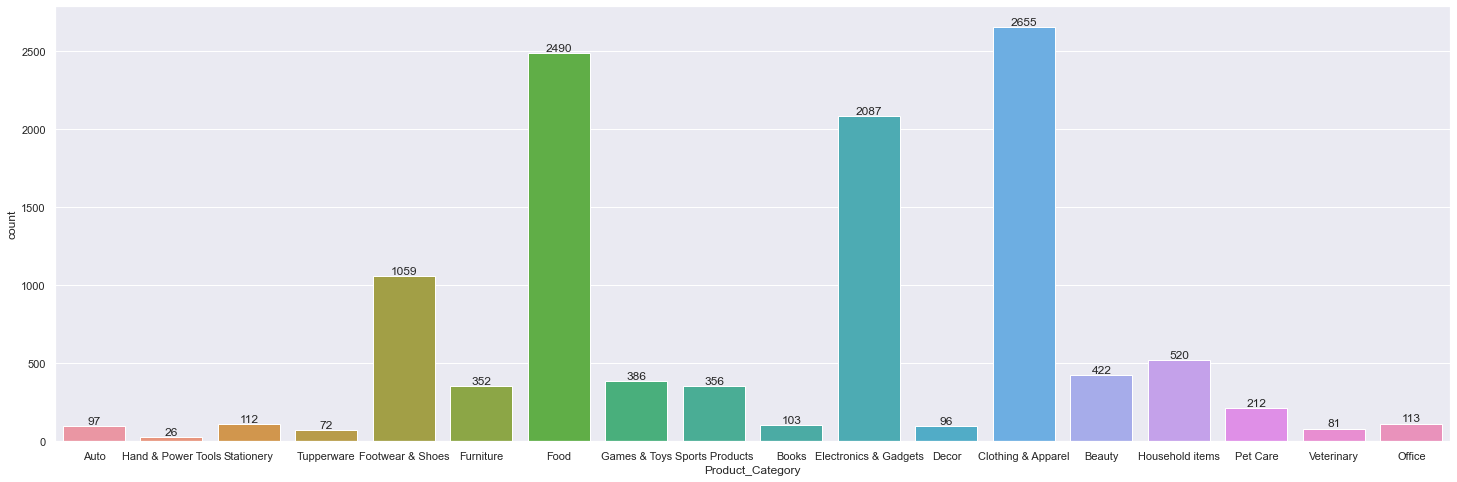

In [139]:
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.countplot(data = df , x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

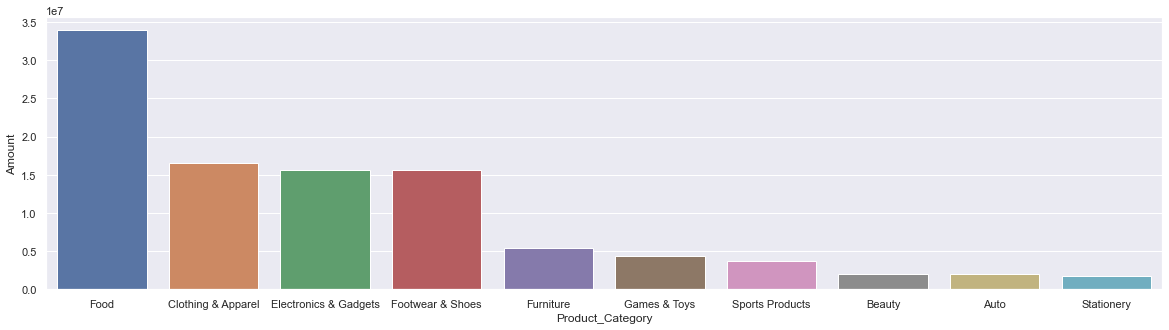

In [140]:
sales_product = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_product)

###### from above graph we can see that most of the amount generated from Food, Clothing & Electronics

<AxesSubplot:ylabel='Product_ID'>

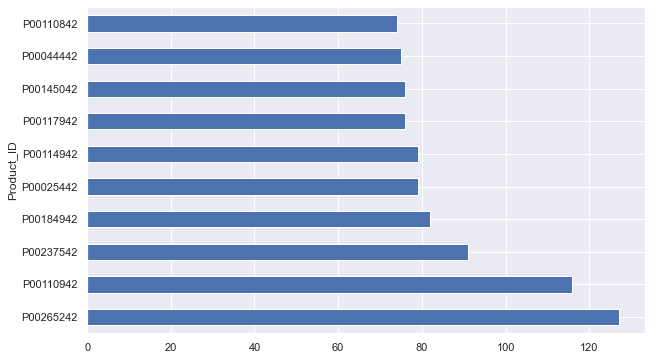

In [141]:
# top 10 most sold products
sns.set(rc={'figure.figsize':(10,6)})
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='barh')

# Conclusion

###### Married Women aged 26-35 years from UP, Maharashtra & Karnataka working in the IT, Healthcare & Aviation Sectors are more likelier to buy products from Food, Clothing & Electronics Categories.